# 필요 라이브러리 import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

In [2]:
warnings.simplefilter(action='ignore')

# Data Dictionary

- PassengerId : 승객 ID </br>
- HomePlanet : 출발 행성(거주지) </br>
- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- Cabin : 객실 종류 및 번호 (port : 좌현, starboard : 우현)</br>
- Destination : 목적지 </br>
- Age : 승객의 나이 </br>
- VIP : 승객의 VIP 서비스 유무 </br>
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck : 승객이 해당 서비스에 대해 지불한 금액 </br>
- Name : 이름 </br>
- Transported : 도착 여부 </br>

In [3]:
train_data = pd.read_csv("./train.csv")
print(train_data.shape)
train_data

(8693, 14)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
test_data = pd.read_csv("./test.csv")
print(test_data.shape)
test_data

(4277, 13)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [5]:
train_data.info() #데이터 자료형 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
train_data.describe() #수치형 데이터 확인

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
train_data.describe(include=['O']) #범주형 데이터 확인

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [8]:
train_data.isna().sum() #데이터 결측치 확인

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

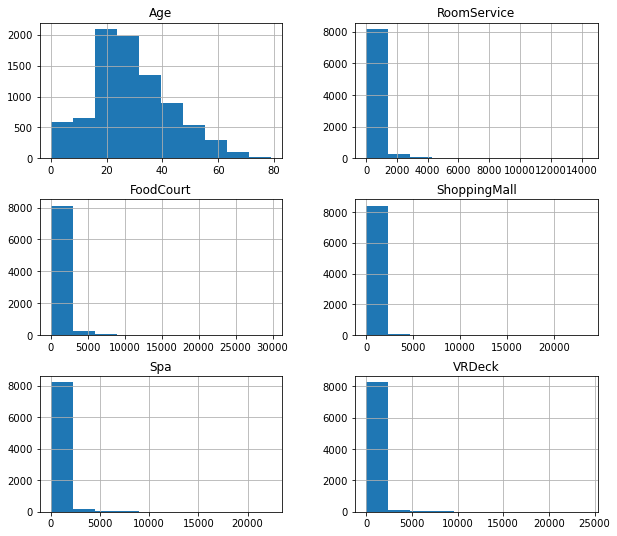

In [9]:
train_data.hist(figsize=(10, 9))
plt.show()

# Data 분석 및 전처리

In [10]:
# 결측치 처리
train_data['CryoSleep'] = train_data['CryoSleep'].fillna(0)
train_data['VIP'] = train_data['VIP'].fillna(0)
train_data['Cabin'] = train_data['Cabin'].fillna(train_data['Cabin'].mode()[0])
train_data['HomePlanet'] = train_data['HomePlanet'].fillna(train_data['HomePlanet'].mode()[0])
train_data['Destination'] = train_data['Destination'].fillna(train_data['Destination'].mode()[0])
train_data['ShoppingMall'] = train_data['ShoppingMall'].fillna(train_data['ShoppingMall'].median())
train_data['VRDeck'] = train_data['VRDeck'].fillna(train_data['VRDeck'].median())
train_data['FoodCourt'] = train_data['FoodCourt'].fillna(train_data['FoodCourt'].median())
train_data['Spa'] = train_data['Spa'].fillna(train_data['Spa'].median())
train_data['RoomService'] = train_data['RoomService'].fillna(train_data['RoomService'].median())
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())

In [11]:
# Cabin 분할
cab = train_data["Cabin"].apply(lambda x: x.split("/"))

train_data["Cab_1"] = cab.apply(lambda x: x[0])
train_data["Cab_3"] = cab.apply(lambda x: x[2])
train_data["Cab_2"] = cab.apply(lambda x: float(x[1]))

In [12]:
#필요 없는 column drop
train_data.drop(['PassengerId', 'Name', 'Cabin'], axis = 1, inplace = True)

In [13]:
# bool형 int로 변경
train_data["VIP"] = train_data["VIP"].astype(int)
train_data["CryoSleep"] = train_data["CryoSleep"].astype(int)

In [14]:
train_data.isna().sum() #데이터 결측치 확인

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Cab_1           0
Cab_3           0
Cab_2           0
dtype: int64

In [15]:
train_data[['VIP', 'Transported']].groupby(['VIP'], as_index=False).mean().sort_values(by='Transported')

,VIP,Transported
1,1,0.381910
0,0,0.506475


In [16]:
train_data[['CryoSleep', 'Transported']].groupby(['CryoSleep'], as_index=False).mean().sort_values(by='Transported')

,CryoSleep,Transported
0,0,0.335042
1,1,0.817583


In [17]:
train_data[['HomePlanet', 'Transported']].groupby(['HomePlanet'], as_index=False).mean().sort_values(by='Transported')

,HomePlanet,Transported
0,Earth,0.427649
2,Mars,0.523024
1,Europa,0.658846


In [18]:
train_data[['Destination', 'Transported']].groupby(['Destination'], as_index=False).mean().sort_values(by='Transported')

,Destination,Transported
2,TRAPPIST-1e,0.472199
1,PSO J318.5-22,0.503769
0,55 Cancri e,0.610000


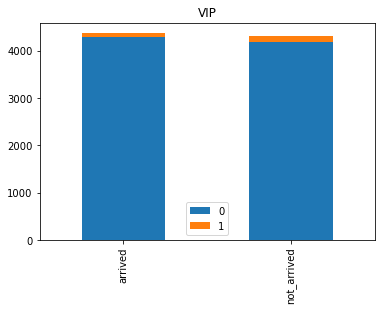

In [19]:
arrived = train_data[train_data['Transported'] == 1]['VIP']. value_counts()
not_arrived = train_data[train_data['Transported'] == 0]['VIP']. value_counts()
df = pd. DataFrame([arrived, not_arrived])
df. index = ['arrived','not_arrived']
df. plot(kind= 'bar',stacked= True , figsize= (6,4))
plt.title('VIP')
plt. show()

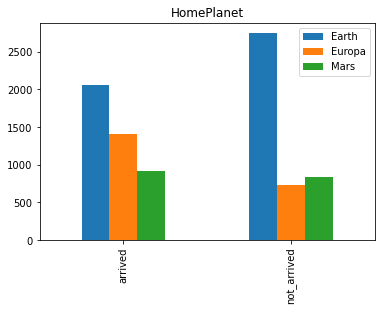

In [20]:
arrived = train_data[train_data['Transported'] == 1]['HomePlanet']. value_counts()
not_arrived = train_data[train_data['Transported'] == 0]['HomePlanet']. value_counts()
df = pd. DataFrame([arrived, not_arrived])
df.index = ['arrived','not_arrived']
df.plot(kind= 'bar',stacked= False , figsize= (6,4))
plt.title('HomePlanet')
plt. show()

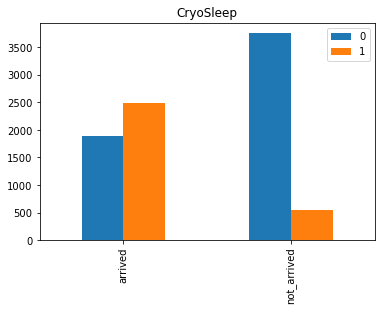

In [21]:
arrived = train_data[train_data['Transported'] == 1]['CryoSleep']. value_counts()
not_arrived = train_data[train_data['Transported'] == 0]['CryoSleep']. value_counts()
df = pd. DataFrame([arrived, not_arrived])
df. index = ['arrived','not_arrived']
df. plot(kind= 'bar',stacked= False, figsize= (6,4))
plt.title('CryoSleep')
plt. show()

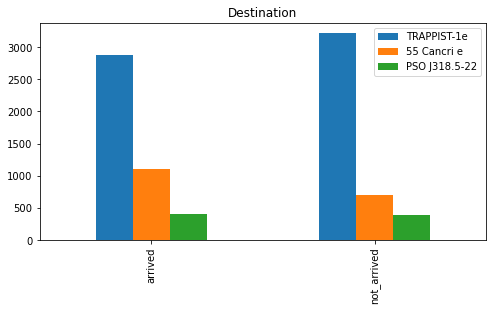

In [22]:
arrived = train_data[train_data['Transported'] == 1]['Destination']. value_counts()
not_arrived = train_data[train_data['Transported'] == 0]['Destination']. value_counts()
df = pd. DataFrame([arrived, not_arrived])
df. index = ['arrived','not_arrived']
df. plot(kind= 'bar',stacked= False , figsize= (8,4))
plt.title('Destination')
plt. show()

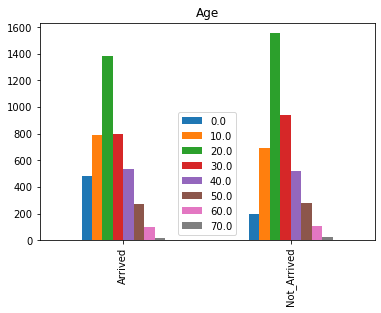

In [23]:
train_data.loc[(train_data['Age'] >= 0) & (train_data['Age'] < 10), 'Age'] = 0
train_data.loc[(train_data['Age'] >= 10) & (train_data['Age'] < 20), 'Age'] = 10
train_data.loc[(train_data['Age'] >= 20) & (train_data['Age'] < 30), 'Age'] = 20
train_data.loc[(train_data['Age'] >= 30) & (train_data['Age'] < 40), 'Age'] = 30
train_data.loc[(train_data['Age'] >= 40) & (train_data['Age'] < 50), 'Age'] = 40
train_data.loc[(train_data['Age'] >= 50) & (train_data['Age'] < 60), 'Age'] = 50
train_data.loc[(train_data['Age'] >= 60) & (train_data['Age'] < 70), 'Age'] = 60
train_data.loc[(train_data['Age'] >= 70) & (train_data['Age'] < 80), 'Age'] = 70

Arrived = train_data[train_data['Transported'] == 1]['Age']. value_counts()
Not_Arrived = train_data[train_data['Transported'] == 0]['Age']. value_counts()
df = pd. DataFrame([Arrived, Not_Arrived])
df. index = ['Arrived','Not_Arrived']
df. plot(kind= 'bar',stacked= False , figsize= (6,4)). legend(loc = 'lower center')
plt.title('Age')
plt. show()

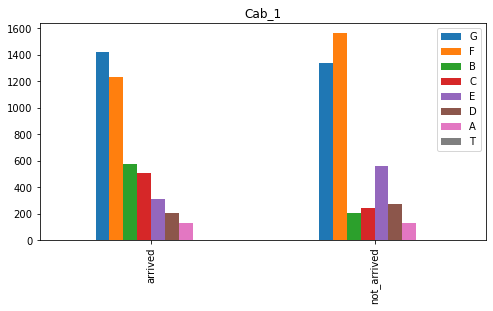

In [25]:
arrived = train_data[train_data['Transported'] == 1]['Cab_1']. value_counts()
not_arrived = train_data[train_data['Transported'] == 0]['Cab_1']. value_counts()
df = pd. DataFrame([arrived, not_arrived])
df. index = ['arrived','not_arrived']
df. plot(kind= 'bar',stacked= False , figsize= (8,4))
plt.title('Cab_1')
plt. show()

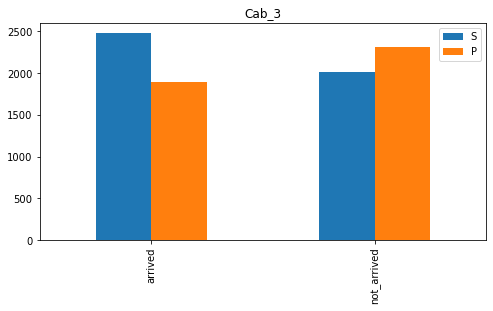

In [26]:
arrived = train_data[train_data['Transported'] == 1]['Cab_3']. value_counts()

not_arrived = train_data[train_data['Transported'] == 0]['Cab_3']. value_counts()
df = pd. DataFrame([arrived, not_arrived])
df. index = ['arrived','not_arrived']
df. plot(kind= 'bar',stacked= False , figsize= (8,4))
plt.title('Cab_3')
plt. show()

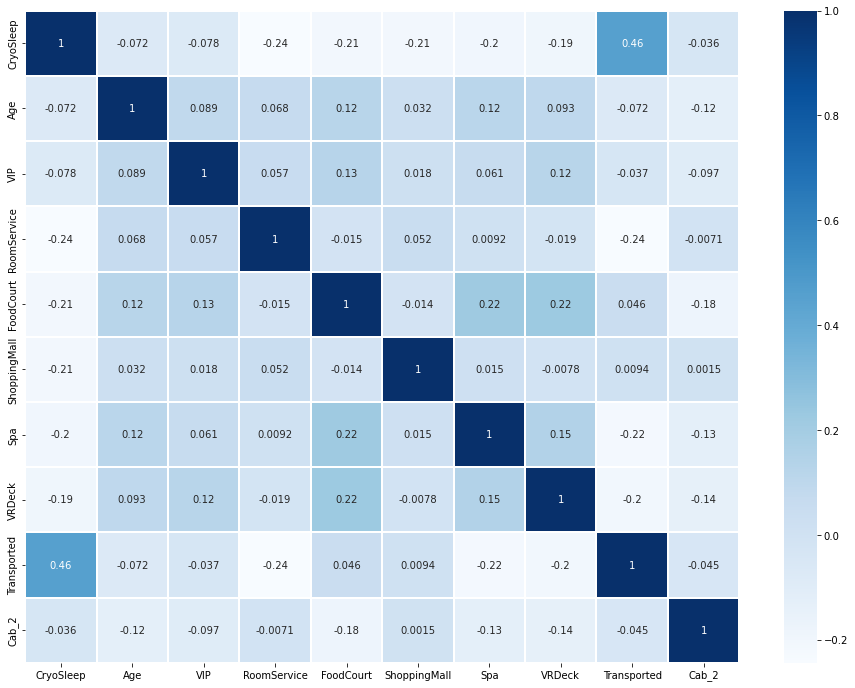

In [27]:
plt.figure(figsize = (16, 12))
x = sns.heatmap(train_data.corr(), cmap = 'Blues', linewidths = '0.1',annot = True)

In [28]:
train_data

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cab_1,Cab_3,Cab_2
0,Europa,0,TRAPPIST-1e,30.0,0,0.0,0.0,0.0,0.0,0.0,False,B,P,0.0
1,Earth,0,TRAPPIST-1e,20.0,0,109.0,9.0,25.0,549.0,44.0,True,F,S,0.0
2,Europa,0,TRAPPIST-1e,50.0,1,43.0,3576.0,0.0,6715.0,49.0,False,A,S,0.0
3,Europa,0,TRAPPIST-1e,30.0,0,0.0,1283.0,371.0,3329.0,193.0,False,A,S,0.0
4,Earth,0,TRAPPIST-1e,10.0,0,303.0,70.0,151.0,565.0,2.0,True,F,S,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0,55 Cancri e,40.0,1,0.0,6819.0,0.0,1643.0,74.0,False,A,P,98.0
8689,Earth,1,PSO J318.5-22,10.0,0,0.0,0.0,0.0,0.0,0.0,False,G,S,1499.0
8690,Earth,0,TRAPPIST-1e,20.0,0,0.0,0.0,1872.0,1.0,0.0,True,G,S,1500.0
8691,Europa,0,55 Cancri e,30.0,0,0.0,1049.0,0.0,353.0,3235.0,False,E,S,608.0


In [29]:
# one-hot-encoding
input_data = train_data.drop(['Transported'], axis = 1)
encoding_train_data = pd.get_dummies(input_data)
encoding_train_data

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cab_2,HomePlanet_Earth,...,Cab_1_A,Cab_1_B,Cab_1_C,Cab_1_D,Cab_1_E,Cab_1_F,Cab_1_G,Cab_1_T,Cab_3_P,Cab_3_S
0,0,30.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,20.0,0,109.0,9.0,25.0,549.0,44.0,0.0,1,...,0,0,0,0,0,1,0,0,0,1
2,0,50.0,1,43.0,3576.0,0.0,6715.0,49.0,0.0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,30.0,0,0.0,1283.0,371.0,3329.0,193.0,0.0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,10.0,0,303.0,70.0,151.0,565.0,2.0,1.0,1,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,40.0,1,0.0,6819.0,0.0,1643.0,74.0,98.0,0,...,1,0,0,0,0,0,0,0,1,0
8689,1,10.0,0,0.0,0.0,0.0,0.0,0.0,1499.0,1,...,0,0,0,0,0,0,1,0,0,1
8690,0,20.0,0,0.0,0.0,1872.0,1.0,0.0,1500.0,1,...,0,0,0,0,0,0,1,0,0,1
8691,0,30.0,0,0.0,1049.0,0.0,353.0,3235.0,608.0,0,...,0,0,0,0,1,0,0,0,0,1


In [30]:
encoding_train_data.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Cab_2', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Cab_1_A',
       'Cab_1_B', 'Cab_1_C', 'Cab_1_D', 'Cab_1_E', 'Cab_1_F', 'Cab_1_G',
       'Cab_1_T', 'Cab_3_P', 'Cab_3_S'],
      dtype='object')

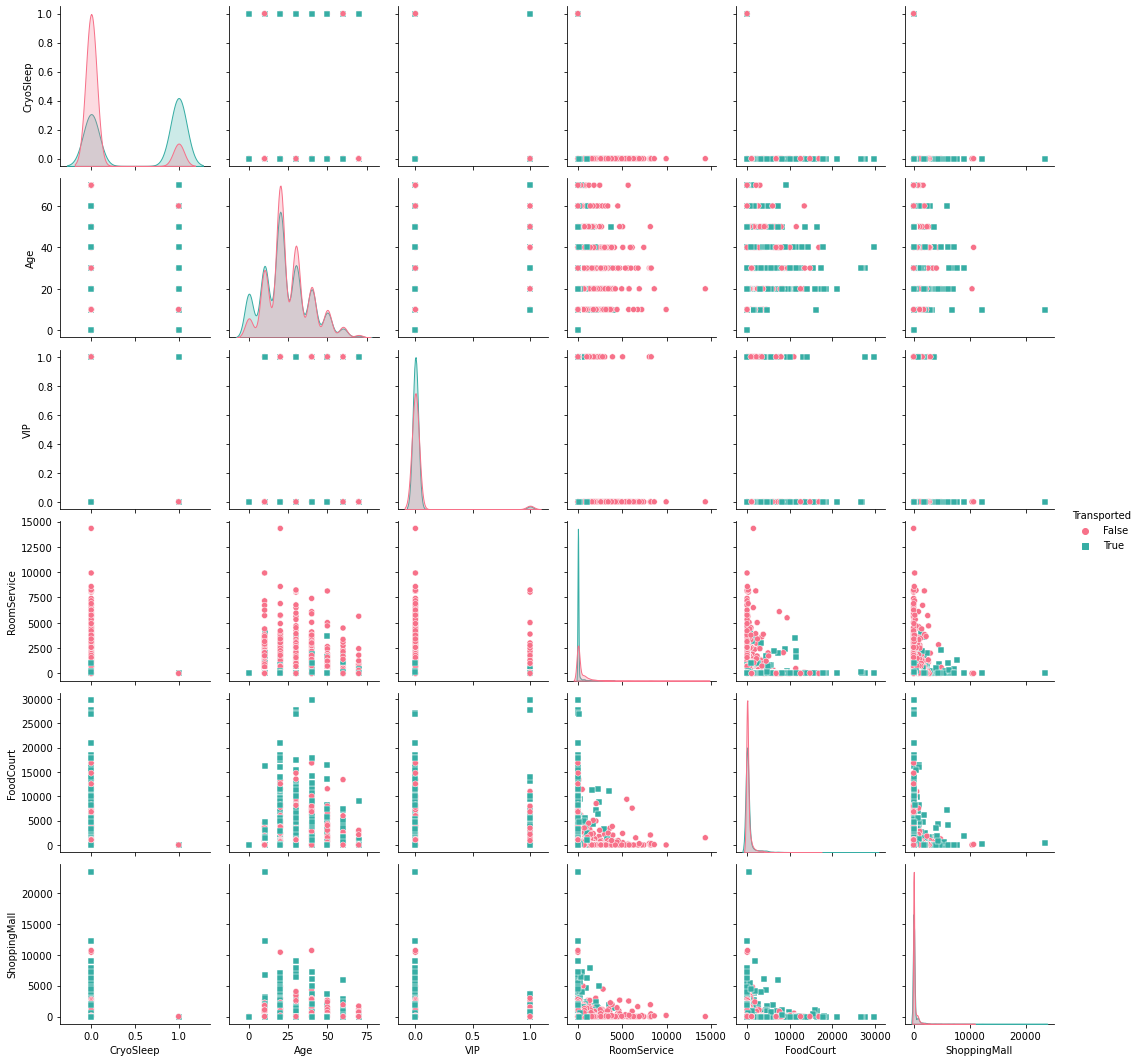

In [31]:
analysis = pd.merge(encoding_train_data, train_data['Transported'], left_index = True, right_index=True)
sns.pairplot(analysis[['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Transported']],hue='Transported', palette='husl', markers=['o','s'])
plt.show()

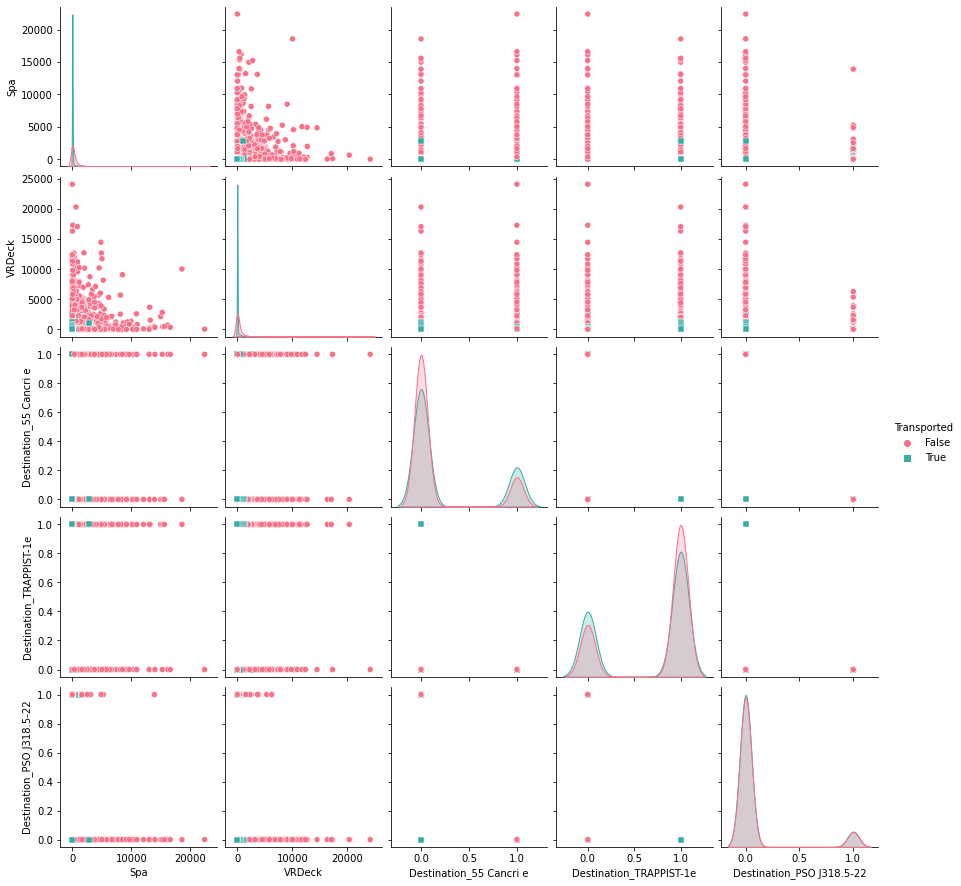

In [32]:
sns.pairplot(analysis[['Spa', 'VRDeck', 'Destination_55 Cancri e', 'Destination_TRAPPIST-1e', 'Destination_PSO J318.5-22', 'Transported']],hue='Transported', palette='husl', markers=['o','s'])
plt.show()

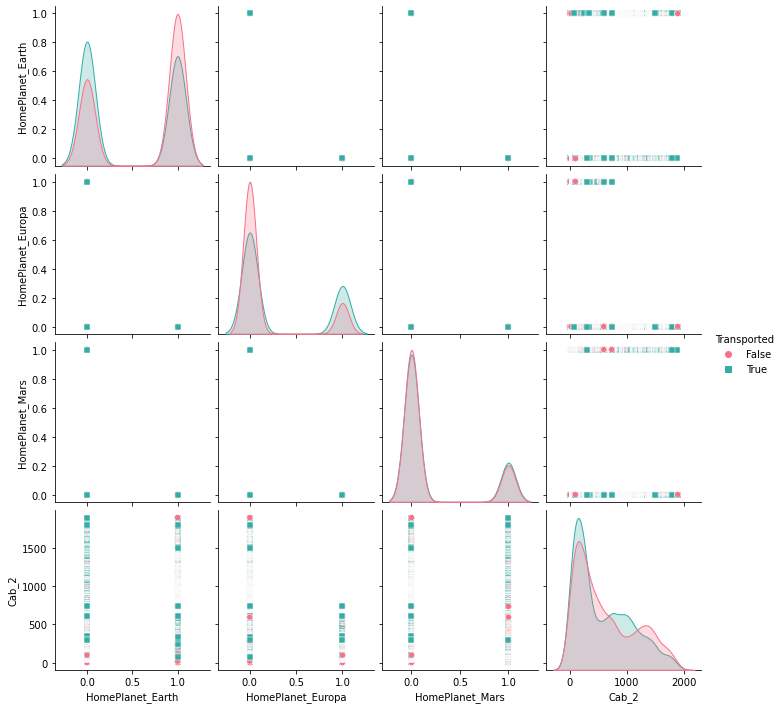

In [33]:
sns.pairplot(analysis[['HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Cab_2', 'Transported']],hue='Transported', palette='husl', markers=['o','s'])
plt.show()

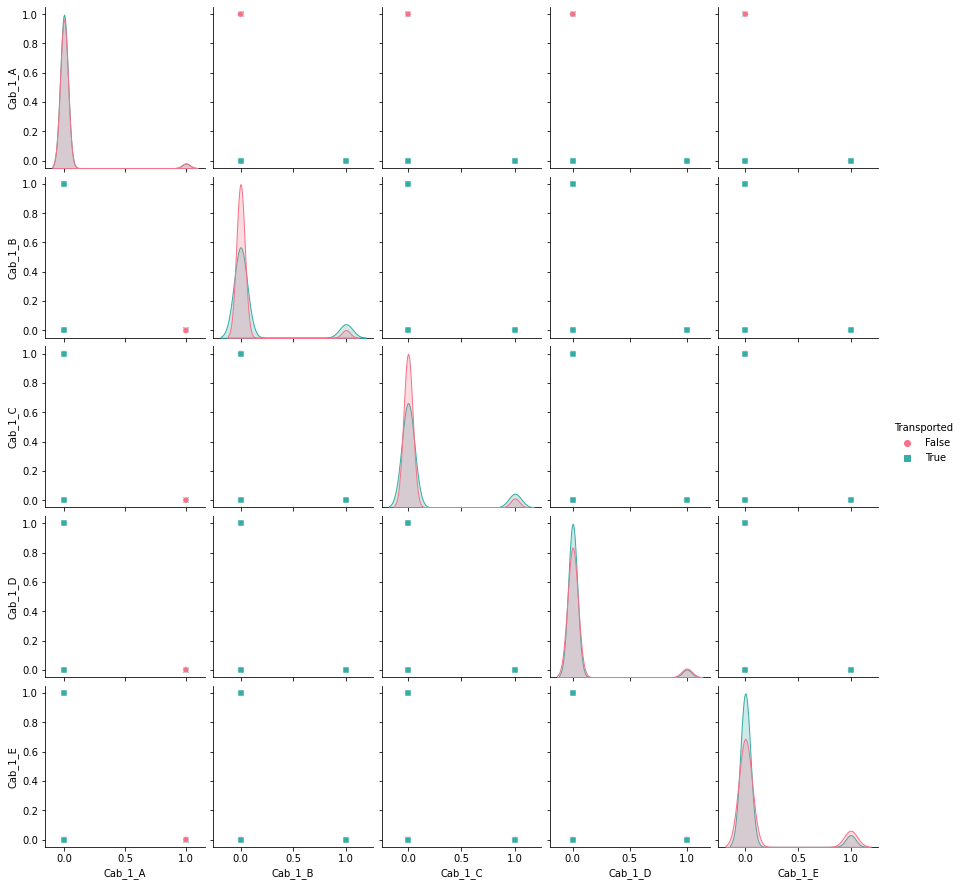

In [34]:
sns.pairplot(analysis[['Cab_1_A','Cab_1_B', 'Cab_1_C', 'Cab_1_D', 'Cab_1_E', 'Transported']],hue='Transported', palette='husl', markers=['o','s'])
plt.show()

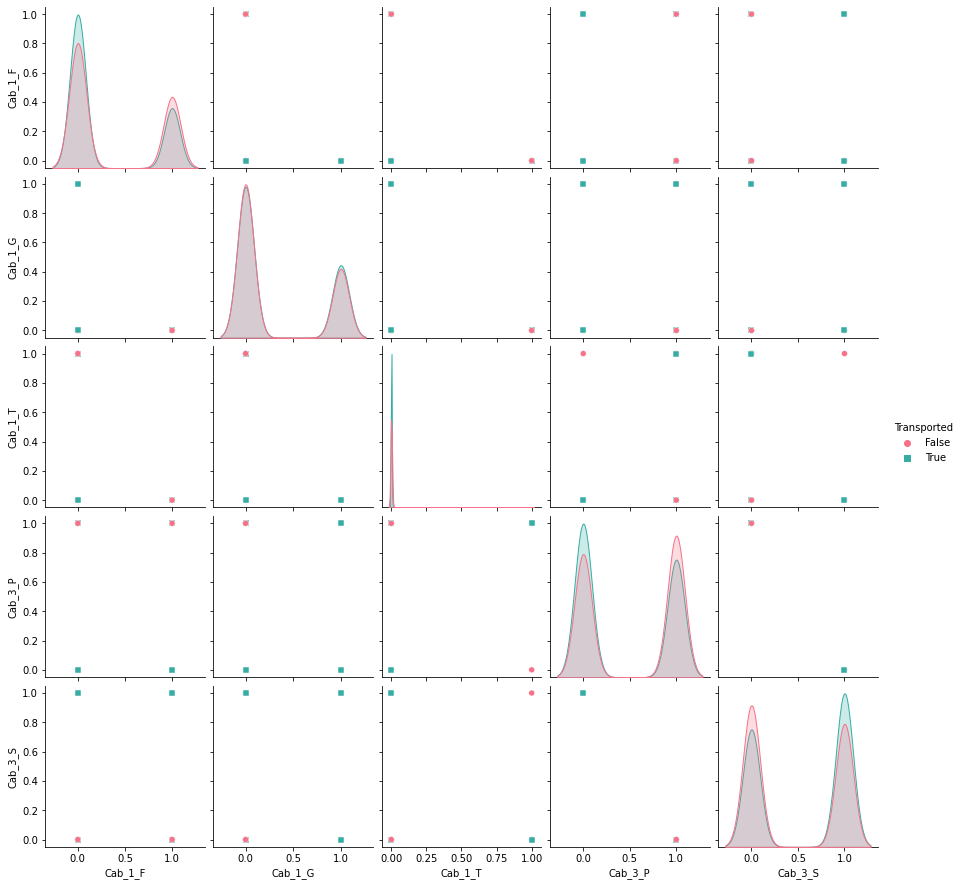

In [35]:
sns.pairplot(analysis[['Cab_1_F', 'Cab_1_G', 'Cab_1_T', 'Cab_3_P', 'Cab_3_S', 'Transported']],hue='Transported', palette='husl', markers=['o','s'])
plt.show()

## PCA를 이용한 RF_CLF

In [ ]:
y_target = train_data['Transported']
x_data = encoding_train_data.drop(['Cab_1_A', 'Cab_1_G', 'Cab_1_T', 'Cab_1_D', 'Cab_1_C', 'VIP', 'HomePlanet_Mars', 'Destination_PSO J318.5-22'], axis = 1)
x_data

In [55]:
pca = PCA(n_components = 15)
pca.fit(encoding_train_data)
pca_train_data = pca.transform(encoding_train_data)
pca_train_data

pca_cols = []
for i in range(0, 15) :
    x = 'pca_col' + str(i)
    pca_cols.append(x)
pca_cols
pca_df = pd.DataFrame(pca_train_data, columns = pca_cols)
pca_df

,pca_col0,pca_col1,pca_col2,pca_col3,pca_col4,pca_col5,pca_col6,pca_col7,pca_col8,pca_col9,pca_col10,pca_col11,pca_col12,pca_col13,pca_col14
0,-535.347993,-188.719052,-27.403608,-245.550408,-117.238721,-653.537368,5.383541,-0.796983,-0.366197,-0.017770,0.286353,-0.913926,-0.100549,0.177470,-0.226839
1,-364.458665,174.659109,351.457671,-144.055849,-124.735158,-625.823860,-5.381881,0.531755,-0.156148,-0.968397,-0.910190,-0.129005,0.535883,-0.171771,0.014381
2,4601.925063,2538.927684,4854.954129,-308.602210,-180.207667,-199.064570,16.125072,0.579121,-0.099649,-0.549653,0.225604,0.079540,0.113742,0.051681,-0.099902
3,1609.039046,1476.551939,2291.397329,-211.094721,214.340015,-444.477834,0.793883,0.608545,-0.324291,-0.342769,0.204035,-0.360191,-0.020333,0.110754,-0.230558
4,-318.082910,132.972395,397.172083,73.583666,-48.130498,-620.134693,-15.778734,0.542451,-0.169015,-0.929047,-0.876199,-0.157027,0.571984,-0.152336,0.037471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,6177.768803,-1848.035906,1045.852609,-222.920840,-92.462310,-162.517509,9.245410,-0.775133,0.123281,0.703482,-0.387375,0.100329,-0.239270,-0.178079,-0.116938
8689,-638.379973,-249.961039,-24.086392,-272.009260,-105.953216,840.430424,-10.685520,0.881249,0.674170,0.757936,0.363698,0.409963,0.130636,0.839468,-0.055533
8690,-646.567980,-232.942008,6.041269,170.492499,1712.649190,835.558407,-1.971557,0.880793,0.686923,-0.137857,0.550122,-0.292131,-0.348851,-0.092157,-0.145338
8691,1397.582212,1789.267072,-1956.461328,-201.672836,-103.007028,175.833515,3.725495,0.723736,-0.324360,0.867923,-0.309738,-0.173883,-0.940699,0.157430,0.539051


In [56]:
y_target = train_data['Transported']

In [58]:
x_train, x_test, y_train, y_test = train_test_split(pca_df, y_target, test_size = 0.2, random_state = 0)

In [59]:
params = { 'n_estimators' : [50, 100, 200, 300, 400],
           'max_depth' : [4, 6, 8, 10, 12, 16],
           'min_samples_leaf' : [4, 8, 12, 16, 20], #과적합 제어
           'min_samples_split' : [4, 8, 12, 16, 20] #과적합 제어
         }

grid_re_clf = RandomForestClassifier(random_state = 5, n_jobs = -1)
grid_cv = GridSearchCV(grid_re_clf, param_grid = params, cv = 5, n_jobs = -1)
grid_cv.fit(x_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 16, 'n_estimators': 100}
최고 예측 정확도: 0.7993


In [76]:
# 모델 학습
pca_model = RandomForestClassifier(n_estimators=100, random_state=5,
                              max_depth=10, min_samples_leaf = 4, min_samples_split = 16, oob_score=True)
pca_model.fit(x_train, y_train)

pred = pca_model.predict(x_test)

# 평가

print("훈련 세트 정확도: {:.3f}".format(pca_model.score(x_train, y_train)) )
print("테스트 세트 정확도: {:.3f}".format(pca_model.score(x_test, y_test)) )
print("OOB 샘플의 정확도: {:.3f}".format(pca_model.oob_score_) )

훈련 세트 정확도: 0.839
테스트 세트 정확도: 0.804
OOB 샘플의 정확도: 0.801


## 아래부터는 그냥 RF_CLF

In [62]:
y_target = train_data['Transported']
x_data = encoding_train_data.drop(['Cab_1_A', 'Cab_1_G', 'Cab_1_T', 'Cab_1_D', 'Cab_1_C', 'VIP', 'HomePlanet_Mars', 'Destination_PSO J318.5-22'], axis = 1)
x_data

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cab_2,HomePlanet_Earth,HomePlanet_Europa,Destination_55 Cancri e,Destination_TRAPPIST-1e,Cab_1_B,Cab_1_E,Cab_1_F,Cab_3_P,Cab_3_S
0,0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,1,0,0,1,0
1,0,20.0,109.0,9.0,25.0,549.0,44.0,0.0,1,0,0,1,0,0,1,0,1
2,0,50.0,43.0,3576.0,0.0,6715.0,49.0,0.0,0,1,0,1,0,0,0,0,1
3,0,30.0,0.0,1283.0,371.0,3329.0,193.0,0.0,0,1,0,1,0,0,0,0,1
4,0,10.0,303.0,70.0,151.0,565.0,2.0,1.0,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,40.0,0.0,6819.0,0.0,1643.0,74.0,98.0,0,1,1,0,0,0,0,1,0
8689,1,10.0,0.0,0.0,0.0,0.0,0.0,1499.0,1,0,0,0,0,0,0,0,1
8690,0,20.0,0.0,0.0,1872.0,1.0,0.0,1500.0,1,0,0,1,0,0,0,0,1
8691,0,30.0,0.0,1049.0,0.0,353.0,3235.0,608.0,0,1,1,0,0,1,0,0,1


In [63]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size = 0.15, random_state = 0)

In [64]:
params = { 'n_estimators' : [50, 100, 200, 300, 400],
           'max_depth' : [4, 6, 8, 10, 12, 16],
           'min_samples_leaf' : [4, 8, 12, 16, 20], #과적합 제어
           'min_samples_split' : [4, 8, 12, 16, 20] #과적합 제어
         }

grid_re_clf = RandomForestClassifier(random_state = 5, n_jobs = -1)
grid_cv = GridSearchCV(grid_re_clf, param_grid = params, cv = 5, n_jobs = -1)
grid_cv.fit(x_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 16, 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estimators': 200}
최고 예측 정확도: 0.8021


In [78]:
# 모델 학습
model = RandomForestClassifier(n_estimators = 200, random_state=5, max_depth = 16, min_samples_leaf = 8, min_samples_split = 4, oob_score=True)
model.fit(x_train, y_train)

pred = model.predict(x_test)

# 평가
print("훈련 세트 정확도: {:.3f}".format(model.score(x_train, y_train)) )
print("테스트 세트 정확도: {:.3f}".format(model.score(x_test, y_test)) )
print("OOB 샘플의 정확도: {:.3f}".format(model.oob_score_) )

훈련 세트 정확도: 0.848
테스트 세트 정확도: 0.806
OOB 샘플의 정확도: 0.802


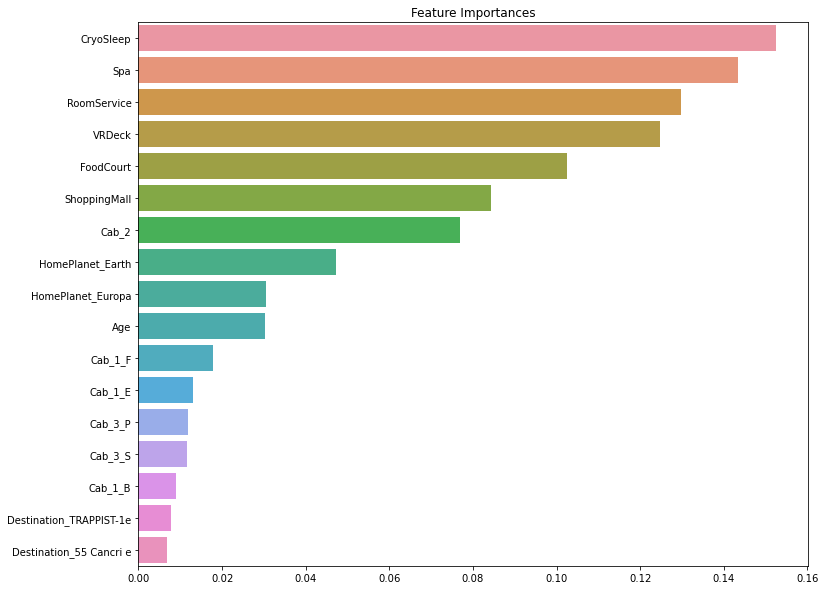

In [66]:
# feature importance 확인

ftr_importances_values = model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_sort = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(12,10))
plt.title('Feature Importances')
sns.barplot(x=ftr_sort, y=ftr_sort.index)
plt.show()

## Test data 적용

In [67]:
test_data.isna().sum() #데이터 결측치 확인

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [68]:
# 결측치 처리
test_data['CryoSleep'] = test_data['CryoSleep'].fillna(0)
test_data['VIP'] = test_data['VIP'].fillna(0)
test_data['Cabin'] = test_data['Cabin'].fillna(test_data['Cabin'].mode()[0])
test_data['HomePlanet'] = test_data['HomePlanet'].fillna(test_data['HomePlanet'].mode()[0])
test_data['Destination'] = test_data['Destination'].fillna(test_data['Destination'].mode()[0])
test_data['ShoppingMall'] = test_data['ShoppingMall'].fillna(test_data['ShoppingMall'].median())
test_data['VRDeck'] = test_data['VRDeck'].fillna(test_data['VRDeck'].median())
test_data['FoodCourt'] = test_data['FoodCourt'].fillna(test_data['FoodCourt'].median())
test_data['Spa'] = test_data['Spa'].fillna(test_data['Spa'].median())
test_data['RoomService'] = test_data['RoomService'].fillna(test_data['RoomService'].median())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())

In [69]:
# Cabin 분할
cab = test_data["Cabin"].apply(lambda x: x.split("/"))

test_data["Cab_1"] = cab.apply(lambda x: x[0])
test_data["Cab_3"] = cab.apply(lambda x: x[2])
test_data["Cab_2"] = cab.apply(lambda x: float(x[1]))

In [70]:
#필요 없는 column drop
test_data.drop(['PassengerId', 'Name', 'Cabin'], axis = 1, inplace = True)

In [71]:
# bool형 int로 변경
test_data["VIP"] = test_data["VIP"].astype(int)
test_data["CryoSleep"] = test_data["CryoSleep"].astype(int)

In [74]:
encoding_test_data = pd.get_dummies(test_data)
encoding_test_data

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cab_2,HomePlanet_Earth,...,Cab_1_A,Cab_1_B,Cab_1_C,Cab_1_D,Cab_1_E,Cab_1_F,Cab_1_G,Cab_1_T,Cab_3_P,Cab_3_S
0,1,27.0,0,0.0,0.0,0.0,0.0,0.0,3.0,1,...,0,0,0,0,0,0,1,0,0,1
1,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,4.0,1,...,0,0,0,0,0,1,0,0,0,1
2,1,31.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,1.0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,20.0,0,10.0,0.0,635.0,0.0,0.0,5.0,1,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,34.0,0,0.0,0.0,0.0,0.0,0.0,1496.0,1,...,0,0,0,0,0,0,1,0,0,1
4273,0,42.0,0,0.0,847.0,17.0,10.0,144.0,160.0,1,...,0,0,0,0,0,0,1,0,1,0
4274,1,26.0,0,0.0,0.0,0.0,0.0,0.0,296.0,0,...,0,0,0,1,0,0,0,0,1,0
4275,0,26.0,0,0.0,2680.0,0.0,0.0,523.0,297.0,0,...,0,0,0,1,0,0,0,0,1,0


In [75]:
test_x_data = encoding_test_data.drop(['Cab_1_A', 'Cab_1_G', 'Cab_1_T', 'Cab_1_D', 'Cab_1_C', 'VIP', 'HomePlanet_Mars', 'Destination_PSO J318.5-22'], axis = 1)
test_x_data

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cab_2,HomePlanet_Earth,HomePlanet_Europa,Destination_55 Cancri e,Destination_TRAPPIST-1e,Cab_1_B,Cab_1_E,Cab_1_F,Cab_3_P,Cab_3_S
0,1,27.0,0.0,0.0,0.0,0.0,0.0,3.0,1,0,0,1,0,0,0,0,1
1,0,19.0,0.0,9.0,0.0,2823.0,0.0,4.0,1,0,0,1,0,0,1,0,1
2,1,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0,1
3,0,38.0,0.0,6652.0,0.0,181.0,585.0,1.0,0,1,0,1,0,0,0,0,1
4,0,20.0,10.0,0.0,635.0,0.0,0.0,5.0,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,34.0,0.0,0.0,0.0,0.0,0.0,1496.0,1,0,0,1,0,0,0,0,1
4273,0,42.0,0.0,847.0,17.0,10.0,144.0,160.0,1,0,0,1,0,0,0,1,0
4274,1,26.0,0.0,0.0,0.0,0.0,0.0,296.0,0,0,1,0,0,0,0,1,0
4275,0,26.0,0.0,2680.0,0.0,0.0,523.0,297.0,0,1,0,1,0,0,0,1,0


## PCA 모델 적용

In [79]:
# pca 모델
pca_model.predict(test_x_data)

array([ True, False,  True, ...,  True,  True,  True])

## 그냥 모델 적용

In [80]:
# pca 이용X
model.predict(test_x_data)

array([ True, False,  True, ...,  True,  True,  True])